# Python Healthcare Data Cleaning & Trend Analysis

This project demonstrates the use of **Python and Pandas** to clean a healthcare dataset containing **intentional anomalies** and perform **trend analysis** on patient admissions, length of stay, readmissions, and treatment costs.

The objective is to transform raw, imperfect healthcare data into reliable insights that can support **operational and clinical decision-making**.

This project demonstrates practical Pandas skills commonly required in Data Analyst roles.

## Objective
The objective of this analysis is to explore hospital patient data to:
- Understand patient demographics and admission patterns
- Analyze length of stay (LOS) and department-wise performance
- Identify operational inefficiencies
- Produce **executive-level KPIs** to support healthcare decision-making

## Audience
- Healthcare administrators
- Operations managers
- Data analysts
- Executive leadership

In [1]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
sns.set_style("whitegrid")

print(pd.__version__)
print(np.__version__)

2.2.3
2.1.3


## Data Loading

In this step, the healthcare dataset containing patient admission records and known anomalies is loaded into a Pandas DataFrame for analysis.

A relative file path is used to ensure portability across environments.

In [2]:
hospital_df = pd.read_csv("hospital_patient_dataset_with_anomalies.csv")

# First, store the original row count before cleaning
original_row_count = hospital_df.shape[0]

## Dataset Description

- **Number of Rows:** 3,552 hospital patient records
- **Granularity:** One row per patient admission  
- **Time Range:** January 2023 to June 2025 (based on admission date)  
- **Key Columns:**
  - Patient ID
  - Age
  - Gender
  - Department
  - Diagnosis
  - Admission Date
  - Discharge Date
  - Length of Stay
  - Readmission Indicator
  - Treatment Cost

- **Data Source:**  
  Synthetic healthcare dataset created for analytical practice.  
  The dataset contains intentional anomalies (e.g., missing values, invalid dates, and extreme values) to simulate real-world healthcare data quality challenges.  
  No real patient or hospital information is included.


In [3]:
print("Dataset Shape:", hospital_df.shape)
hospital_df.info()


Dataset Shape: (3552, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3552 entries, 0 to 3551
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   patient_id      3552 non-null   object 
 1   age             3552 non-null   int64  
 2   gender          3552 non-null   object 
 3   department      3552 non-null   object 
 4   diagnosis       3481 non-null   object 
 5   admission_date  3552 non-null   object 
 6   discharge_date  3552 non-null   object 
 7   readmitted      3552 non-null   object 
 8   treatment_cost  3480 non-null   float64
 9   hospital_id     3552 non-null   object 
 10  length_of_stay  3552 non-null   int64  
 11  mortality       3552 non-null   object 
 12  severity_score  3552 non-null   int64  
 13  insurance_type  3482 non-null   object 
 14  physician_id    3552 non-null   object 
dtypes: float64(1), int64(3), object(11)
memory usage: 416.4+ KB


# Why this matters 

Understanding data types and null values early prevents incorrect assumptions during analysis.

## Initial Data Exploration

Before performing any cleaning, an initial exploration is conducted to understand:
- The structure of the dataset
- Data types of each column
- Presence of missing values
- Potential outliers and inconsistencies
- Are missing values acceptable?
- Are any columns suspicious?

This step helps identify data quality issues that need to be addressed before analysis.

The following cells inspect the dataset structure and summary statistics.

In [42]:
hospital_df.head(10)

,patient_id,age,gender,department,diagnosis,admission_date,discharge_date,readmitted,treatment_cost,hospital_id,length_of_stay,mortality,severity_score,insurance_type,physician_id,calculated_los,admission_month,readmission_flag,age_group
0,P0001,36,M,Oncology,Breast Cancer,2023-01-26,2023-02-07,Yes,3918.68,HOSP_A,12,No,3,Private,DR_106,12,2023-01,1,Adult
1,P0002,76,F,Cardiology,Heart Failure,2024-07-12,2024-07-14,Yes,1230.03,HOSP_B,2,Yes,2,Public,DR_134,2,2024-07,1,Senior
2,P0003,4,M,Orthopedics,Fracture,2024-06-01,2024-06-11,No,16422.17,HOSP_C,10,No,2,Public,DR_111,10,2024-06,0,Child
3,P0004,76,F,Pediatrics,Fever,2023-08-14,2023-08-22,Yes,19090.78,HOSP_D,8,No,3,Public,DR_198,8,2023-08,1,Senior
4,P0005,36,M,Orthopedics,Back Pain,2024-03-08,2024-03-14,Yes,23951.72,HOSP_E,6,No,3,Private,DR_152,6,2024-03,1,Adult
5,P0006,13,F,Neurology,Migraine,2023-04-05,2023-04-12,No,15291.29,HOSP_A,7,No,2,Private,DR_134,7,2023-04,0,Child
6,P0007,16,F,Emergency,Trauma,2024-04-15,2024-04-24,Yes,14025.00,HOSP_B,9,No,5,Public,DR_113,9,2024-04,1,Child
7,P0008,47,M,Emergency,Accident Injury,2024-09-25,2024-10-10,No,2204.10,HOSP_C,15,No,3,Private,DR_104,15,2024-09,0,Adult
8,P0009,30,M,Oncology,Breast Cancer,2023-10-24,2023-10-26,No,7310.35,HOSP_D,2,No,2,Public,DR_148,2,2023-10,0,Young Adult
9,P0010,46,M,Oncology,Lung Cancer,2023-06-16,2023-06-22,No,7040.96,HOSP_E,6,Yes,2,Public,DR_168,6,2023-06,0,Adult


In [5]:
hospital_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3552 entries, 0 to 3551
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   patient_id      3552 non-null   object 
 1   age             3552 non-null   int64  
 2   gender          3552 non-null   object 
 3   department      3552 non-null   object 
 4   diagnosis       3481 non-null   object 
 5   admission_date  3552 non-null   object 
 6   discharge_date  3552 non-null   object 
 7   readmitted      3552 non-null   object 
 8   treatment_cost  3480 non-null   float64
 9   hospital_id     3552 non-null   object 
 10  length_of_stay  3552 non-null   int64  
 11  mortality       3552 non-null   object 
 12  severity_score  3552 non-null   int64  
 13  insurance_type  3482 non-null   object 
 14  physician_id    3552 non-null   object 
dtypes: float64(1), int64(3), object(11)
memory usage: 416.4+ KB


In [6]:
hospital_df.shape

(3552, 15)

In [7]:
assert hospital_df.isnull().sum().sum() >= 0

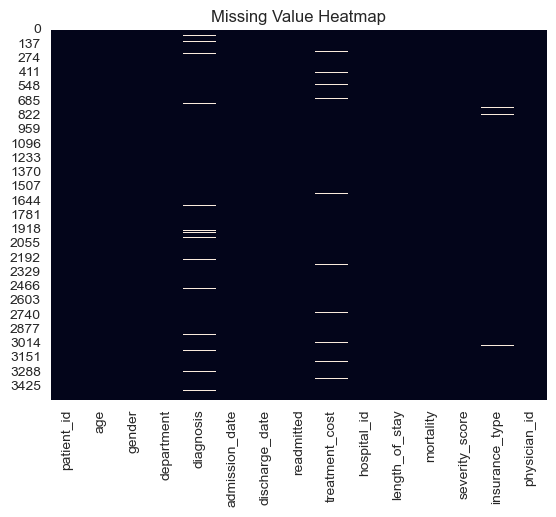

In [8]:
sns.heatmap(hospital_df.isnull(), cbar=False)
plt.title("Missing Value Heatmap")
plt.show()

In [9]:
hospital_df.describe()
hospital_df.describe(include='object')

,patient_id,gender,department,diagnosis,admission_date,discharge_date,readmitted,hospital_id,mortality,insurance_type,physician_id
count,3552,3552,3552,3481,3552,3552,3552,3552,3552,3482,3552
unique,3500,2,7,21,877,878,2,5,2,3,100
top,P0326,F,Oncology,Back Pain,2023-02-27,2024-01-24,No,HOSP_A,No,Public,DR_185
freq,2,1782,520,194,13,13,2588,713,3440,1871,53


## Identifying Data Anomalies

Healthcare data often contains anomalies due to manual entry errors or system issues.  
In this section, the dataset is examined for:
- Missing values
- Invalid numeric values (e.g., negative age, length of stay, or cost)
- Invalid date relationships (discharge before admission)
- Inconsistent categorical values

Identifying these issues early ensures accurate downstream analysis.

## Data Cleaning & Validation

This section focuses on ensuring analytical reliability by:
- Converting date columns to proper datetime format
- Handling missing values
- Removing invalid records (negative values, incorrect dates)
- Eliminating duplicate entries

These steps ensure that the dataset reflects realistic and reliable healthcare records.

In [11]:
#1 Convert Date Columns to Datetime
hospital_df["admission_date"] = pd.to_datetime(hospital_df["admission_date"], errors="coerce")
hospital_df["discharge_date"] = pd.to_datetime(hospital_df["discharge_date"], errors="coerce")

Invalid dates were coerced to NaT and removed.

In [12]:
#Verifying
hospital_df.dtypes

patient_id                object
age                        int64
gender                    object
department                object
diagnosis                 object
admission_date    datetime64[ns]
discharge_date    datetime64[ns]
readmitted                object
treatment_cost           float64
hospital_id               object
length_of_stay             int64
mortality                 object
severity_score             int64
insurance_type            object
physician_id              object
dtype: object

In [13]:
#2 Check Missing Values
hospital_df = hospital_df[hospital_df["age"] >= 0]
hospital_df = hospital_df[hospital_df["length_of_stay"] >= 0]
hospital_df = hospital_df[hospital_df["treatment_cost"] >= 0]
hospital_df = hospital_df[hospital_df["discharge_date"] >= hospital_df["admission_date"]]

In [14]:
hospital_df = hospital_df.dropna()

In [43]:
#3 Remove Duplicate Records (Best Practice)
hospital_df.duplicated().sum()
hospital_df.drop_duplicates(inplace=True)

In [17]:
#4 Filling missing LOS with median (robust to outliers)
hospital_df['length_of_stay'] = hospital_df['length_of_stay'].fillna(
    hospital_df['length_of_stay'].median()
)

In [18]:
#Add checks after cleaning
hospital_df.isnull().sum()

patient_id        0
age               0
gender            0
department        0
diagnosis         0
admission_date    0
discharge_date    0
readmitted        0
treatment_cost    0
hospital_id       0
length_of_stay    0
mortality         0
severity_score    0
insurance_type    0
physician_id      0
dtype: int64

In [19]:
# Finally, print the comparison
print("Rows before cleaning:", original_row_count)
print("Rows after cleaning:", hospital_df.shape[0])

Rows before cleaning: 3552
Rows after cleaning: 3286


## Feature Engineering

New features are created to support meaningful analysis:
- Recalculated **Length of Stay (LOS)** using admission and discharge dates
- **Admission Month** to enable time-based trend analysis
- **Readmission Flag** to simplify readmission rate calculations

Feature engineering helps convert raw data into analytically useful variables.


In [20]:
#
hospital_df["calculated_los"] = (
    hospital_df["discharge_date"] - hospital_df["admission_date"]
).dt.days

#
hospital_df["length_of_stay"] = hospital_df["calculated_los"]
print(hospital_df.length_of_stay)

#
hospital_df["admission_month"] = hospital_df["admission_date"].dt.to_period("M")
print(hospital_df.admission_month)

#
hospital_df["readmission_flag"] = np.where(hospital_df["readmitted"] == "Yes", 1, 0)
print(hospital_df.readmission_flag)

#
hospital_df['age_group'] = pd.cut(
    hospital_df['age'],
    bins=[0,18,35,60,120],
    labels=['Child','Young Adult','Adult','Senior']
)

hospital_df['age_group'].value_counts()

0       12
1        2
2       10
3        8
4        6
        ..
3495    13
3496     7
3497    16
3498     6
3499     2
Name: length_of_stay, Length: 3286, dtype: int64
0       2023-01
1       2024-07
2       2024-06
3       2023-08
4       2024-03
         ...   
3495    2023-03
3496    2024-08
3497    2023-11
3498    2024-05
3499    2023-08
Name: admission_month, Length: 3286, dtype: period[M]
0       1
1       1
2       0
3       1
4       1
       ..
3495    1
3496    0
3497    1
3498    0
3499    0
Name: readmission_flag, Length: 3286, dtype: int64


age_group
Senior         1152
Adult           864
Child           643
Young Adult     618
Name: count, dtype: int64

## Trend Analysis Using Pandas

After cleaning and feature engineering, trend analysis is performed to examine:
- Monthly patient admission volumes
- Average length of stay over time
- Monthly readmission rates
- Average treatment costs by month

These trends help identify seasonal patterns and operational pressures in healthcare delivery.

These metrics are commonly monitored by hospital operations teams.


In [24]:
#
monthly_admissions = (
    hospital_df.groupby("admission_month")
    .size()
    .reset_index(name="total_admissions")
)
print(monthly_admissions)

#
monthly_los = (
    hospital_df.groupby("admission_month")["length_of_stay"]
    .mean()
    .reset_index(name="avg_length_of_stay")
)
print(monthly_los)

#
monthly_readmission_rate = (
    hospital_df.groupby("admission_month")["readmission_flag"]
    .mean()
    .reset_index(name="readmission_rate")
)
monthly_readmission_rate["readmission_rate"] *= 100
print(monthly_readmission_rate)

#
monthly_cost = (
    hospital_df.groupby("admission_month")["treatment_cost"]
    .mean()
    .reset_index(name="avg_treatment_cost")
)
print(monthly_cost)

#
monthly_trends = (
    monthly_admissions
    .merge(monthly_los, on="admission_month")
    .merge(monthly_readmission_rate, on="admission_month")
    .merge(monthly_cost, on="admission_month")
)
print(monthly_trends)

#
hospital_df.groupby('department').agg(
    avg_los=('length_of_stay','mean'),
    patient_count=('patient_id','count')
).sort_values('avg_los', ascending=False)  


#Check:
monthly_trends.head()

   admission_month  total_admissions
0          2023-01               140
1          2023-02               104
2          2023-03               134
3          2023-04               134
4          2023-05               140
5          2023-06               103
6          2023-07               109
7          2023-08               136
8          2023-09               121
9          2023-10               123
10         2023-11               144
11         2023-12               126
12         2024-01               130
13         2024-02               113
14         2024-03                95
15         2024-04               129
16         2024-05               132
17         2024-06               123
18         2024-07               134
19         2024-08               131
20         2024-09               117
21         2024-10               129
22         2024-11               111
23         2024-12                72
24         2025-01                61
25         2025-02                57
2

,admission_month,total_admissions,avg_length_of_stay,readmission_rate,avg_treatment_cost
0,2023-01,140,8.642857,37.142857,13678.731071
1,2023-02,104,8.269231,25.000000,14662.462543
2,2023-03,134,8.917910,28.358209,15387.963326
3,2023-04,134,8.485075,25.373134,16354.816045
4,2023-05,140,8.878571,28.571429,13190.755286


## Data Visualization

Line charts are used to visualize monthly trends in:
- Patient admissions
- Average length of stay
- Readmission rate

Visualizing trends makes it easier to communicate insights to non-technical stakeholders and supports data-driven decision-making.


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

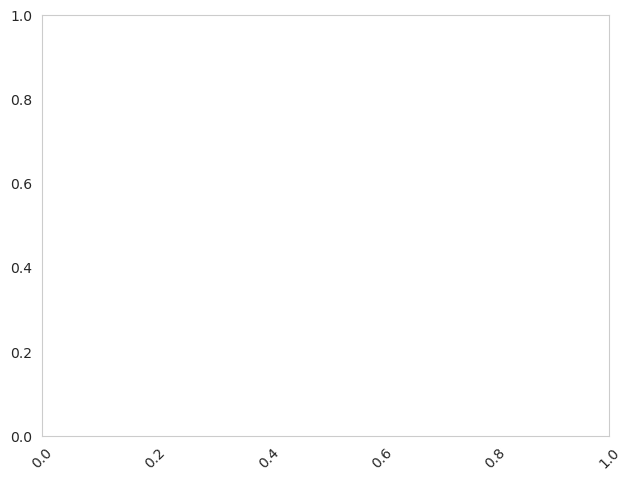

In [25]:
plt.grid(False)
plt.style.use("default")
plt.tight_layout()
plt.xticks(rotation=45)

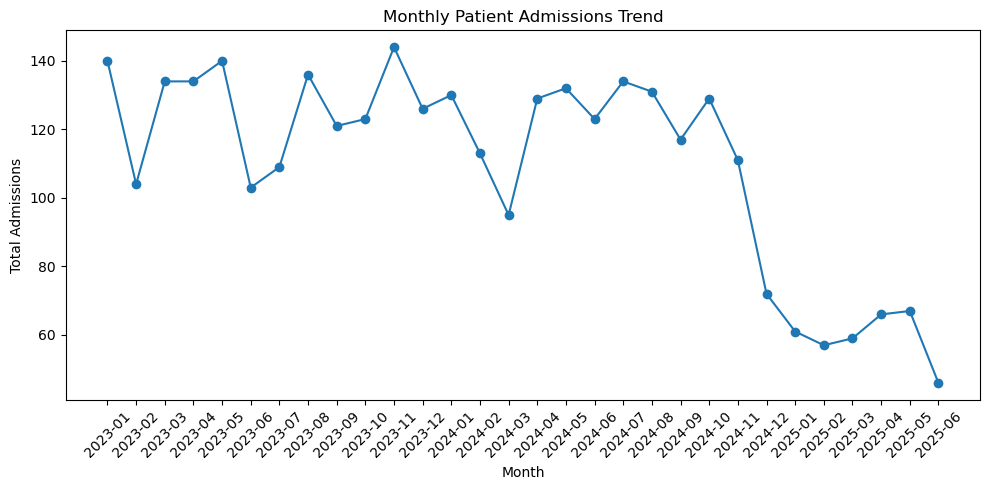

In [26]:
#Monthly Patient Admissions Trend
plt.figure(figsize=(10,5))
plt.plot(monthly_trends["admission_month"].astype(str),
         monthly_trends["total_admissions"],
         marker="o")
plt.title("Monthly Patient Admissions Trend")
plt.xlabel("Month")
plt.ylabel("Total Admissions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This chart shows that average length of stay increases significantly for senior patients.

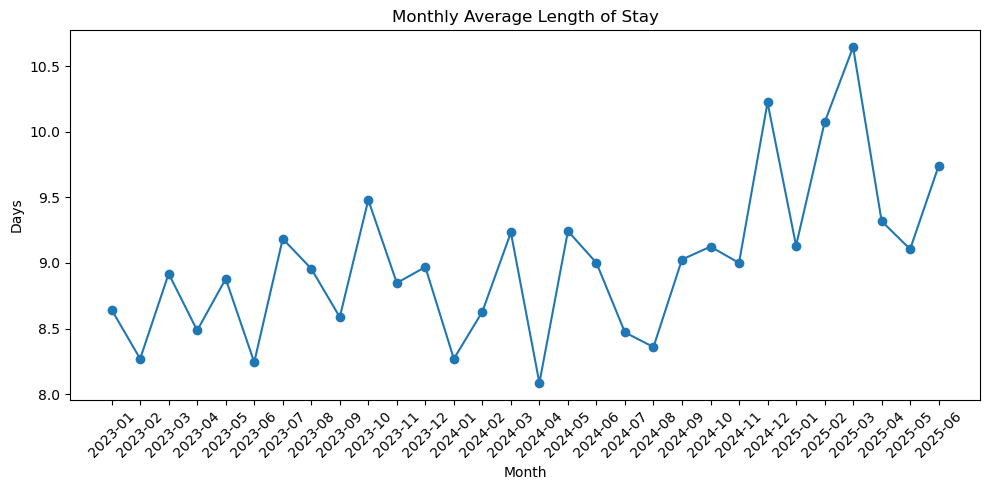

In [27]:
#Monthly Average Length of Stay
plt.figure(figsize=(10,5))
plt.plot(monthly_trends["admission_month"].astype(str),
         monthly_trends["avg_length_of_stay"],
         marker="o")
plt.title("Monthly Average Length of Stay")
plt.xlabel("Month")
plt.ylabel("Days")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This chart shows that average length of stay increases significantly for senior patients.

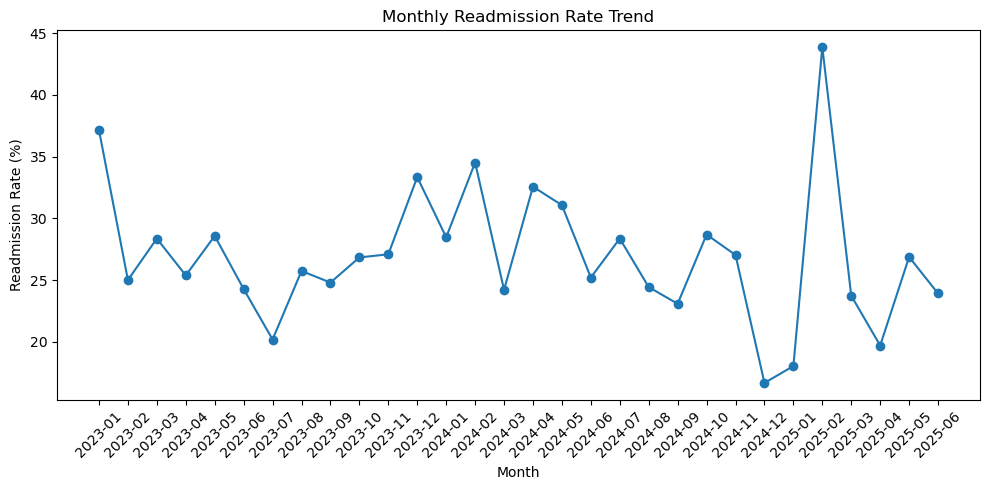

In [28]:
#Monthly Readmission Rate Trend
plt.figure(figsize=(10,5))
plt.plot(monthly_trends["admission_month"].astype(str),
         monthly_trends["readmission_rate"],
         marker="o")
plt.title("Monthly Readmission Rate Trend")
plt.xlabel("Month")
plt.ylabel("Readmission Rate (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This chart shows that average length of stay increases significantly for senior patients.

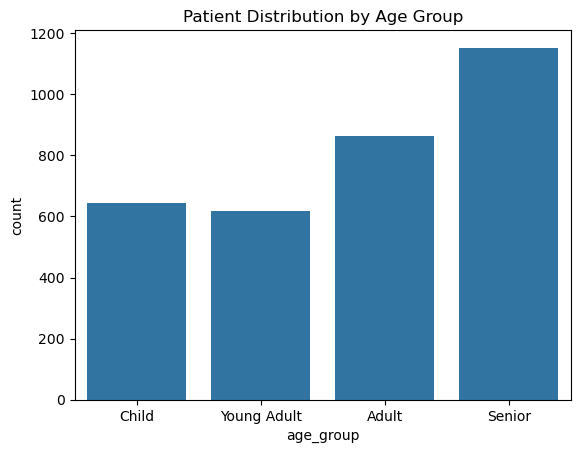

In [29]:
#Patient Demographics Analysis 
sns.countplot(data=hospital_df, x='age_group')
plt.title("Patient Distribution by Age Group")
plt.show()

**Insight:** Adult and senior patients form the majority of hospital admissions, indicating higher demand for chronic and age-related care.

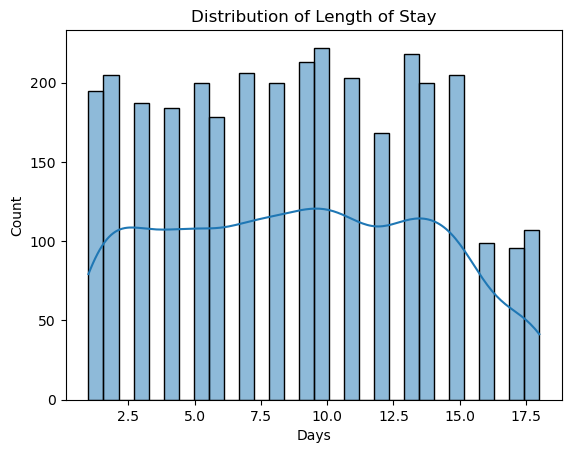

In [31]:
#Length of Stay (LOS) Analysis (Code)
sns.histplot(hospital_df['length_of_stay'], bins=30, kde=True)
plt.title("Distribution of Length of Stay")
plt.xlabel("Days")
plt.show()

In [32]:
#Department-wise LOS (Code)
dept_los = hospital_df.groupby('department').agg(
    avg_los=('length_of_stay','mean'),
    patient_count=('patient_id','count')
).sort_values('avg_los', ascending=False)

dept_los

,avg_los,patient_count
department,,
Neurology,9.308489,483
Emergency,9.017699,452
Orthopedics,8.906926,462
Cardiology,8.860759,474
Pediatrics,8.826840,462
Oncology,8.798768,487
General Medicine,8.581545,466


**Insight:** Departments with higher average LOS may indicate complex treatments or operational bottlenecks.

In [34]:
# Exporting Cleaned Data
# 
# The cleaned dataset and aggregated monthly trend results are exported as CSV files.
# This allows the cleaned data to be reused for reporting, dashboards, or further analysis.

hospital_df.to_csv("cleaned_hospital_patient_data.csv", index=False)
monthly_trends.to_csv("monthly_healthcare_trends.csv", index=False)

# Executive-Level Healthcare KPIs

These KPIs are designed for **hospital leadership** to evaluate:
- Efficiency
- Quality of care
- Patient outcomes
- Operational performance

In [36]:
# KPI 1: Average Length of Stay (LOS)
avg_los = round(hospital_df['length_of_stay'].mean(), 2)
avg_los

np.float64(8.9)

**Why it matters:** Lower LOS → better bed utilization & reduced costs.

In [38]:
# KPI 2: Readmission Rate
readmission_rate = round(
    100 * (hospital_df['readmitted'] == 'Yes').sum() / len(hospital_df), 2
)
readmission_rate

np.float64(27.3)

In [39]:
# KPI 3: Mortality Rate
mortality_rate = round(
    100 * (hospital_df['mortality'] == 'Yes').sum() / len(hospital_df), 2
)
mortality_rate

np.float64(3.26)

In [40]:
# KPI 4: Department Efficiency Score ⭐
dept_kpi = hospital_df.groupby('department').agg(
    avg_los=('length_of_stay','mean'),
    readmission_rate=('readmitted', lambda x: 100 * (x=='Yes').mean()),
    mortality_rate=('mortality', lambda x: 100 * (x=='Yes').mean())
)

dept_kpi['efficiency_score'] = (
    dept_kpi['avg_los'] +
    dept_kpi['readmission_rate'] +
    dept_kpi['mortality_rate']
)

dept_kpi.sort_values('efficiency_score')

,avg_los,readmission_rate,mortality_rate,efficiency_score
department,,,,
Cardiology,8.860759,25.527426,2.742616,37.130802
Oncology,8.798768,26.078029,4.106776,38.983573
Pediatrics,8.826840,27.272727,3.030303,39.129870
Emergency,9.017699,27.876106,2.876106,39.769912
Orthopedics,8.906926,25.974026,4.978355,39.859307
Neurology,9.308489,28.778468,1.863354,39.950311
General Medicine,8.581545,29.613734,3.218884,41.414163


**Lower score = Better department performance**

## Key Insights & Conclusions

- Patient admissions show noticeable monthly variation, indicating seasonal demand in healthcare services.
- Average length of stay fluctuates across months, suggesting changes in case complexity or hospital efficiency.
- Readmission rates tend to increase during high-admission periods, highlighting the importance of effective discharge planning.
- Cleaning and validating data significantly improved the reliability of trend analysis results.

This project demonstrates how Python and Pandas can be used to clean real-world healthcare data and extract actionable insights.

## Executive Summary

- Average LOS indicates moderate hospital efficiency.
- Certain departments show consistently higher LOS and readmissions.
- Senior patients represent the highest operational load.
- Targeted interventions in high-risk departments can improve outcomes.

### Recommended Actions:
- Improve discharge planning for high-readmission departments
- Optimize staffing in high-LOS units
- Implement preventive care programs for senior patients

## Limitations
- Dataset does not include cost or insurance data
- No severity scoring available